### MODULE 6.1.4 - Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# The zip object packs each pair of lats and lngs having the 
# same index in their respective array into a tuple.

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

### MODULE 6.1.5 - Generate Random World Cities

In [5]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and 
# longitude combinations.

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ilulissat gl
lamlash gb
cape town za
lichuan cn
alofi nu
ust-kamchatsk ru
acapulco mx
road town vg
ushuaia ar
qaanaaq gl
garden city us
severo-kurilsk ru
lebu cl
thompson ca
thinadhoo mv
busselton au
lebu cl
puerto ayora ec
saint-philippe re
samusu ws
illoqqortoormiut gl
abha sa
fairbanks us
qaanaaq gl
hilo us
castro cl
kavieng pg
grindavik is
albany au
tiksi ru
hermanus za
yellowknife ca
izhma ru
tuktoyaktuk ca
nikolskoye ru
mataura pf
kapaa us
dingle ie
cabedelo br
zyryanka ru
kedrovyy ru
korla cn
guapiles cr
saskylakh ru
atuona pf
nizhneyansk ru
cairns au
kaitangata nz
clyde river ca
san carlos de bariloche ar
grand river south east mu
geraldton au
tasiilaq gl
attawapiskat ca
sentyabrskiy ru
rikitea pf
tawnat ma
ponta do sol cv
kalianget id
albany au
aklavik ca
saskylakh ru
henties bay na
victoria sc
kanigoro id
illoqqortoormiut gl
new norfolk au
busselton au
kattivakkam in
inderborskiy kz
chuy uy
san cristobal ec
katsuura jp
punta arenas cl
bafra tr
gizo sb
ushuaia ar
mar del plata

hilo us
cajimos ph
ngukurr au
saint-philippe re
chuy uy
punta arenas cl
butaritari ki
qaanaaq gl
busselton au
bluff nz
mys shmidta ru
rikitea pf
hermanus za
hunza pk
rikitea pf
cidreira br
caranavi bo
okhotsk ru
vanderhoof ca
upernavik gl
albany au
kaitangata nz
qaanaaq gl
aswan eg
pisco pe
san patricio mx
sisimiut gl
cape town za
kargopol ru
albany au
saint george bm
westport nz
kachug ru
ovruch ua
marfino ru
el dorado us
saint george bm
miri my
saskylakh ru
hobart au
hamilton bm
dudinka ru
victoria sc
dikson ru
cabo san lucas mx
altay cn
kachug ru
bluff nz
kapaa us
hobart au
bluff nz
nikolskoye ru
severo-kurilsk ru
deutschlandsberg at
bardiyah ly
port alfred za
latung ph
bairiki ki
castro cl
punta arenas cl
punta arenas cl
ginir et
sorland no
albany au
taolanaro mg
great yarmouth gb
varhaug no
iqaluit ca
punta arenas cl
ust-kamchatsk ru
bluff nz
atuona pf
rikitea pf
new norfolk au
hermanus za
villa rica us
kishtwar in
egvekinot ru
kaitangata nz
skibbereen ie
grand river south east mu

In [7]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

594

## MODULE 6.2.2 - Get Started with OpenWeatherMap API

### The JavaScript Object Notation Format for API Data

In [8]:
# Import the python json api requests library.

import requests
requests.__version__

'2.26.0'

## MODULE 6.2.3 - Make an API Call

In [9]:
# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=abc099052a5349cfe46bb60032b64932&q=Boston


## MODULE 6.2.4 - Make a Request for Data to an API

In [12]:
# Make a 'Get' request for the city weather. If you get 
# a [200] response code, it means the request was valid.

city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# If we tried to get weather data from an unrecognized city, 
# or if the weather data for a city wasn't available, 
# we would get a 404 response. For example, if we miss-spelled
# "Boston" in our city request.

city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

### Get Data from a Response

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":58.3,"feels_like":57.83,"temp_min":53.31,"temp_max":62.33,"pressure":1023,"humidity":85},"visibility":10000,"wind":{"speed":1.54,"deg":160,"gust":1.74},"clouds":{"all":0},"dt":1632102540,"sys":{"type":2,"id":2001997,"country":"US","sunrise":1632047319,"sunset":1632091640},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 58.3,
  'feels_like': 57.83,
  'temp_min': 53.31,
  'temp_max': 62.33,
  'pressure': 1023,
  'humidity': 85},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 160, 'gust': 1.74},
 'clouds': {'all': 0},
 'dt': 1632102540,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1632047319,
  'sunset': 1632091640},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

### Handle Request Errors

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [18]:
# Create an endpoint URL for a city to test error handling.

city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


## MODULE 6.2.5 - Parse a Response from an API

In [19]:
# Before we collect weather data from more than 500 cities, 
# we'll walk through how to get the weather data from Boston.
# Create an endpoint URL for a city.

city_url = url + "&q=" + "Boston" 
city_weather = requests.get(city_url) 
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 58.3,
  'feels_like': 57.83,
  'temp_min': 53.31,
  'temp_max': 62.33,
  'pressure': 1023,
  'humidity': 85},
 'visibility': 10000,
 'wind': {'speed': 1.54, 'deg': 160, 'gust': 1.74},
 'clouds': {'all': 0},
 'dt': 1632102540,
 'sys': {'type': 2,
  'id': 2001997,
  'country': 'US',
  'sunrise': 1632047319,
  'sunset': 1632091640},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data.
boston_data = city_weather.json()

In [21]:
boston_data['sys'] 

{'type': 2,
 'id': 2001997,
 'country': 'US',
 'sunrise': 1632047319,
 'sunset': 1632091640}

In [22]:
boston_data['sys'] ['country']

'US'

In [23]:
boston_data['dt']

1632102540

In [24]:
# Get latitude value from the Boston JSON data.

boston_data['coord']['lat']

42.3584

In [25]:
# Get maximum temperature value from the Boston JSON data.

boston_data['main']['temp_max']

62.33

In [26]:
# Get the latitude, longitude, maximum temperature, 
# humidity, percent cloudiness, and wind speed.

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 62.33 85 0 1.54


### Convert the Date Timestamp

In [27]:
# The date format will appear in seconds, as we saw when we 
# ran this code. This format is called Coordinated Universal 
# Time (UTC) or Greenwich Mean Time (GMT). If we want to 
# convert the timestamp to the International Organization 
# for Standardization (ISO) format, or YYYY-MM-DD-HH-MM-SS, 
# we need to use the Python datetime module.

# Import the datetime module from the datetime library.

from datetime import datetime

# Get the date from the JSON file.

date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.

datetime.utcfromtimestamp(date)

datetime.datetime(2021, 9, 20, 1, 49)

In [28]:
# We can convert this datetime format to 2019-10-21 17:24:35 
# using the Python string format method.

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-09-20 01:49:00'

## MODULE 6.2.6 - Get the City Weather Data

In [29]:
# Import the datetime module from the datetime library.

from datetime import datetime

In [30]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


### Loop Through the List of Cities and Build the City URL using the **_enumerate_** method.

In [31]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city and remove spaces by 
    # concatenating cities with several words in their name.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | lamlash
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | lichuan
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 7 of Set 1 | acapulco
Processing Record 8 of Set 1 | road town
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | garden city
Processing Record 12 of Set 1 | severo-kurilsk
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | thinadhoo
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | samusu
City not found. Skipping...
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | abha
Processing Record 22 of Set 1 | fairbanks
Pr

Processing Record 35 of Set 4 | zhigansk
Processing Record 36 of Set 4 | camacha
Processing Record 37 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 4 | carmen del parana
Processing Record 39 of Set 4 | parrita
Processing Record 40 of Set 4 | barawe
City not found. Skipping...
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | kasongo-lunda
Processing Record 43 of Set 4 | batemans bay
Processing Record 44 of Set 4 | chifeng
Processing Record 45 of Set 4 | bayir
Processing Record 46 of Set 4 | rabo de peixe
Processing Record 47 of Set 4 | nelson bay
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | khuzhir
Processing Record 1 of Set 5 | dambulla
Processing Record 2 of Set 5 | inhambane
Processing Record 3 of Set 5 | avarua
Processing Record 4 of Set 5 | plymouth
Processing Record 5 of Set 5 | hay river
Processing Record 6 of Set 5 | yen bai
Processing Record 7 of Set 5 | sakaim

Processing Record 28 of Set 8 | altay
Processing Record 29 of Set 8 | deutschlandsberg
Processing Record 30 of Set 8 | bardiyah
Processing Record 31 of Set 8 | latung
Processing Record 32 of Set 8 | bairiki
Processing Record 33 of Set 8 | ginir
Processing Record 34 of Set 8 | sorland
Processing Record 35 of Set 8 | great yarmouth
Processing Record 36 of Set 8 | varhaug
Processing Record 37 of Set 8 | iqaluit
Processing Record 38 of Set 8 | villa rica
Processing Record 39 of Set 8 | kishtwar
Processing Record 40 of Set 8 | skibbereen
Processing Record 41 of Set 8 | acarau
Processing Record 42 of Set 8 | sacramento
Processing Record 43 of Set 8 | umm kaddadah
Processing Record 44 of Set 8 | saleaula
City not found. Skipping...
Processing Record 45 of Set 8 | neryungri
Processing Record 46 of Set 8 | pilar
Processing Record 47 of Set 8 | najran
Processing Record 48 of Set 8 | dongsheng
Processing Record 49 of Set 8 | trairi
Processing Record 50 of Set 8 | baykit
Processing Record 1 of Set

Processing Record 15 of Set 12 | araouane
Processing Record 16 of Set 12 | talaya
Processing Record 17 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 18 of Set 12 | kerema
Processing Record 19 of Set 12 | urucui
Processing Record 20 of Set 12 | chebsara
Processing Record 21 of Set 12 | buqayq
City not found. Skipping...
Processing Record 22 of Set 12 | tarko-sale
Processing Record 23 of Set 12 | amalapuram
Processing Record 24 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 25 of Set 12 | kumluca
Processing Record 26 of Set 12 | phangnga
Processing Record 27 of Set 12 | telde
Processing Record 28 of Set 12 | kirkland lake
Processing Record 29 of Set 12 | capao da canoa
Processing Record 30 of Set 12 | vilhena
Processing Record 31 of Set 12 | barnstaple
Processing Record 32 of Set 12 | elko
Processing Record 33 of Set 12 | dhidhdhoo
Processing Record 34 of Set 12 | ramshir
Processing Record 35 of Set 12 | inuvik
Processing Record 36 of Set 12 | 

In [33]:
# Tally the number of cities in the city_data array of 
# dictionaries using the len() function.

#len(city_data)

# ----> RUN ALL LINES ABOVE AGAIN. IF YOU DO NOT GET MORE THAN 500 CITIES, INCREASE THE 1500 NUMBER UNTIL YOU DO <----.

## MODULE 6.2.7 - Create a DataFrame of City Weather Data

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.tail (10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
535,Inuvik,68.3499,-133.7218,47.26,42,20,4.61,CA,2021-09-20 01:58:30
536,Vangaindrano,-23.3500,47.6000,62.29,89,80,1.79,MG,2021-09-20 01:57:44
537,Puerto Penasco,31.3167,-113.5333,85.98,77,20,5.99,MX,2021-09-20 02:01:22
538,Gien,47.6933,2.6309,57.29,98,100,8.01,FR,2021-09-20 02:01:23
539,Kholmogory,64.2229,41.6560,37.51,72,100,3.29,RU,2021-09-20 02:01:24
540,Fortuna,40.5982,-124.1573,66.47,67,1,12.66,US,2021-09-20 02:01:25
541,Raudeberg,61.9875,5.1352,54.19,89,100,5.99,NO,2021-09-20 02:01:26
542,Utica,43.1009,-75.2327,58.91,89,0,1.07,US,2021-09-20 02:01:27
543,La Primavera,5.4906,-70.4092,78.66,79,39,0.51,CO,2021-09-20 02:01:28
544,Whyalla,-33.0333,137.5833,59.68,41,27,23.20,AU,2021-09-20 02:01:29


In [37]:
# Reorder columns in the city_data_df Data Frame

new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2021-09-20 01:50:44,69.2167,-51.1000,15.85,70,100,6.71
1,Lamlash,GB,2021-09-20 01:50:45,55.5336,-5.1296,48.27,90,0,1.52
2,Cape Town,ZA,2021-09-20 01:46:51,-33.9258,18.4232,58.87,82,75,1.01
3,Lichuan,CN,2021-09-20 01:50:47,30.3000,108.8500,68.83,68,1,2.59
4,Alofi,NU,2021-09-20 01:50:48,-19.0595,-169.9187,82.29,69,2,6.91
5,Acapulco,MX,2021-09-20 01:46:13,16.8634,-99.8901,79.75,82,46,2.68
6,Road Town,VG,2021-09-20 01:46:14,18.4167,-64.6167,80.69,74,2,14.92
7,Ushuaia,AR,2021-09-20 01:50:51,-54.8000,-68.3000,40.66,75,75,16.11
8,Qaanaaq,GL,2021-09-20 01:50:52,77.4840,-69.3632,10.62,82,19,7.45
9,Garden City,US,2021-09-20 01:50:53,42.3256,-83.3310,70.99,64,40,4.61


In [38]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV, with the index label
# (or column A) header as "City_ID." If we ever need to 
# export the CSV file to a DataFrame, that header will 
# be present in the DataFrame.

city_data_df.to_csv(output_data_file, index_label="City_ID")

## MODULE 6.3.1 - Plot Latitude vs. Temperature

In [39]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [40]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1632104341.801907

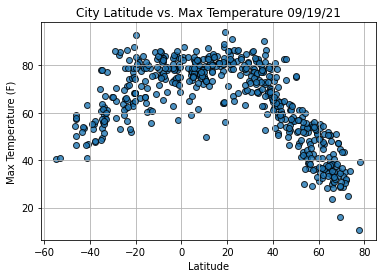

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## MODULE 6.3.2 - Plot Latitude vs. Humidity

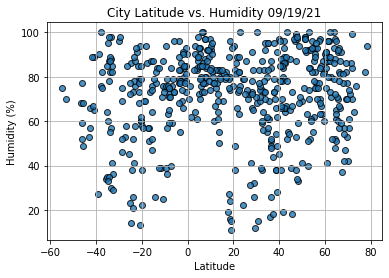

In [42]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## MODULE 6.3.3 - Plot Latitude vs. Cloudiness

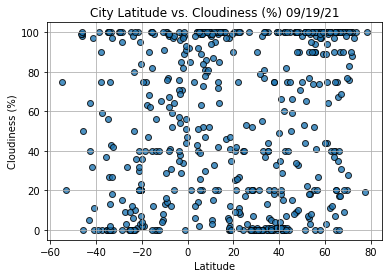

In [43]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## MODULE 6.3.4 - Plot Latitude vs. Wind Speed

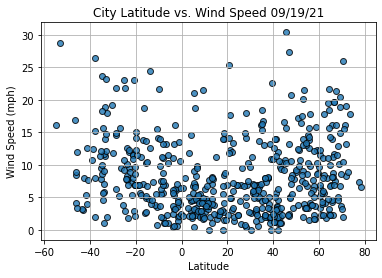

In [44]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## MODULE 6.4.1 - Use Linear Regression to Find the Relationship Between Variables

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function (i.e. subroutine) to perform linear 
# regression on theweather data and plot a regression line and 
# the equation with the data. This function will have 5 imputs.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

### Create the Hemisphere DataFrames

In [50]:
# Take a look at the 13th record on the city_data_df Data Frame
index13 = city_data_df.loc[13]
index13

City                    Thinadhoo
Country                        MV
Date          2021-09-20 01:50:58
Lat                        0.5333
Lng                       72.9333
Max Temp                    83.57
Humidity                       70
Cloudiness                     92
Wind Speed                   6.46
Name: 13, dtype: object

In [51]:
# Filter the Data Frame for northern hemisphere (i.e. lat >=0)
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
540     True
541     True
542     True
543     True
544    False
Name: Lat, Length: 545, dtype: bool

In [52]:
# List all cities in the northern hemisphere.
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ilulissat,GL,2021-09-20 01:50:44,69.2167,-51.1000,15.85,70,100,6.71
1,Lamlash,GB,2021-09-20 01:50:45,55.5336,-5.1296,48.27,90,0,1.52
3,Lichuan,CN,2021-09-20 01:50:47,30.3000,108.8500,68.83,68,1,2.59
5,Acapulco,MX,2021-09-20 01:46:13,16.8634,-99.8901,79.75,82,46,2.68
6,Road Town,VG,2021-09-20 01:46:14,18.4167,-64.6167,80.69,74,2,14.92


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

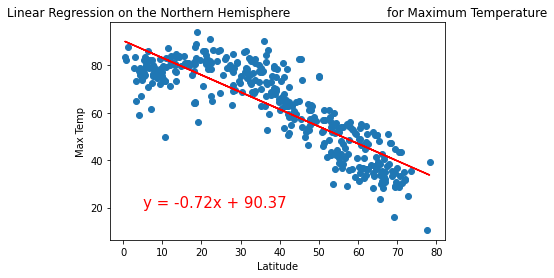

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,20))

### Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

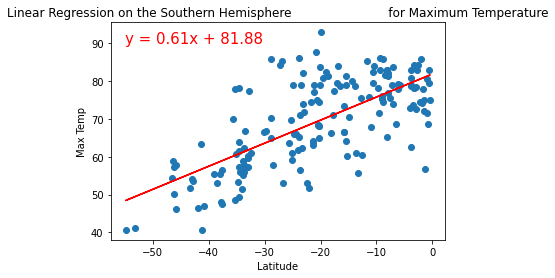

In [61]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))


## MODULE 6.4.3 - Find the Correlation Between Latitude and Percent Humidity

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

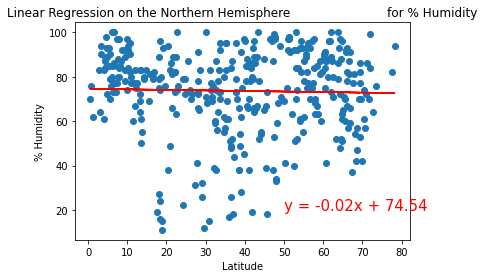

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(50,20))

### Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

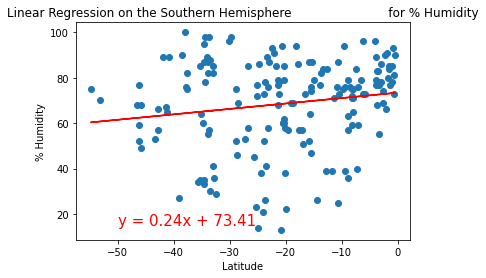

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

## MODULE 6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness

### Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

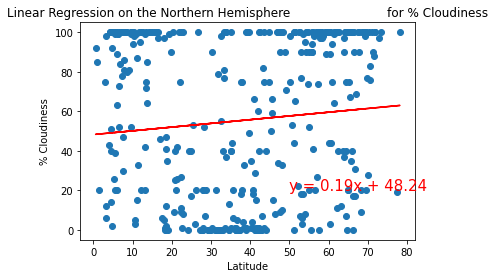

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,20))

### Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

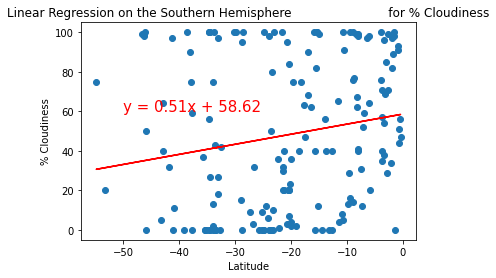

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

## MODULE 6.4.5 - Find the Correlation Between Latitude and Wind Speed

### Perform Linear Regression on the Wind Speed for the Northern Hemisphere

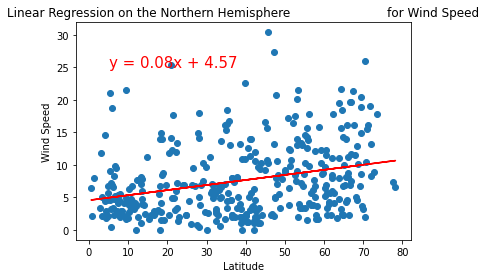

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,25))

### Perform Linear Regression on the Wind Speed for the Southern Hemisphere

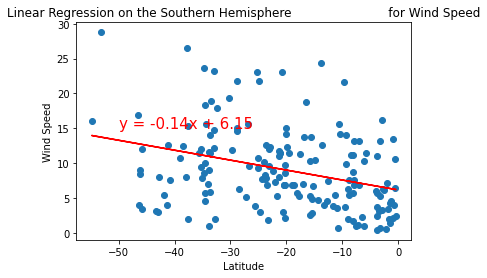

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

## MODULE 6.5.2 - Create Heatmaps for Weather Parameters

In [84]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (/Users/ignacioguerra/Desktop/DATA_BOOTCAMP_WORK/MODULE_6/World_Weather_Analysis/config.py)